In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, SpectralEmbedding
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

In [47]:
def load_coil20(data_dir='coil-20-unproc', img_size=(32,32)):
    X = []
    y = []
    for obj_num in range(1, 21):
        for angle in range(0, 360, 5):
            file_name = f'obj{obj_num}__{angle}.png'
            img_path = os.path.join(data_dir, file_name)
            if os.path.exists(img_path):
                img = imread(img_path)
                if img.ndim == 3:
                    img = rgb2gray(img)
                img = resize(img, img_size, anti_aliasing=True)
                X.append(img.flatten())
                y.append(obj_num)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [49]:
X, y = load_coil20(data_dir=r'C:\Users\moham\Desktop\M2\jbilou\Projet\coil-20-unproc', img_size=(32,32))
print("Données chargées :", X.shape, "Labels :", y.shape)

Données chargées : (75, 1024) Labels : (75,)


In [51]:
# 2. Prétraitement
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# 3. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
# 4. Réduction de dimension


# Pour COIL-20, la LDA n’est pas adaptée :LDA est supervisée et limite le nombre de composantes à C−1=19 (ici 20 objets → max 19 dimensions).

# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Isomap ---
isomap = Isomap(n_neighbors=10, n_components=2)
X_iso = isomap.fit_transform(X_scaled)

# --- Laplacian Eigenmaps (Spectral Embedding) ---
laplacian = SpectralEmbedding(n_neighbors=10, n_components=2)
X_lap = laplacian.fit_transform(X_scaled)


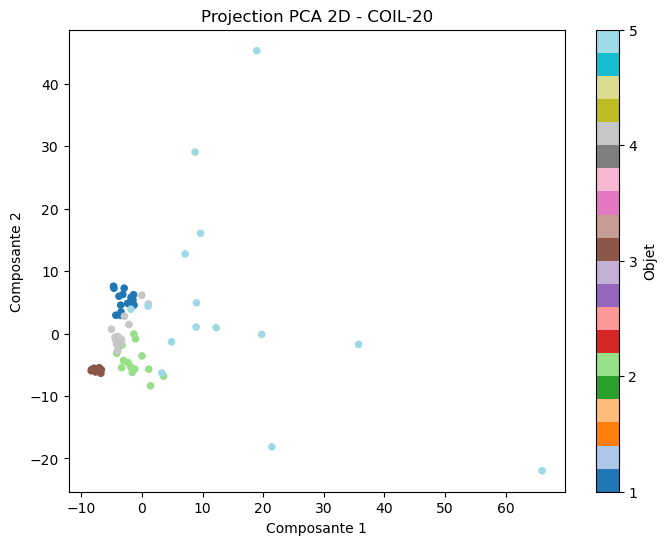

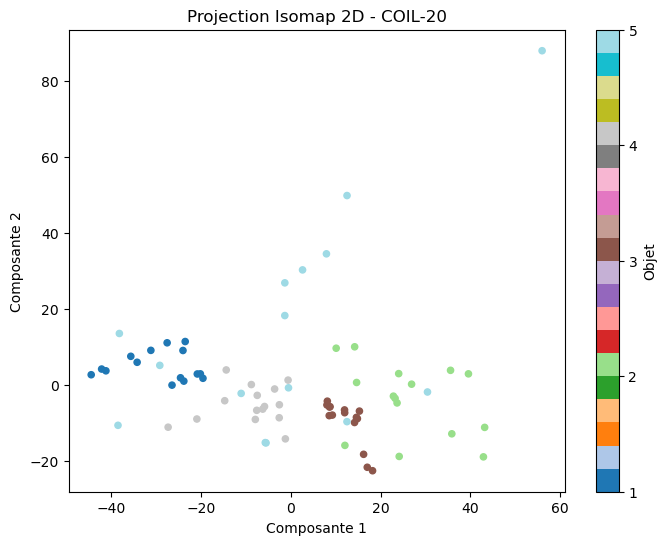

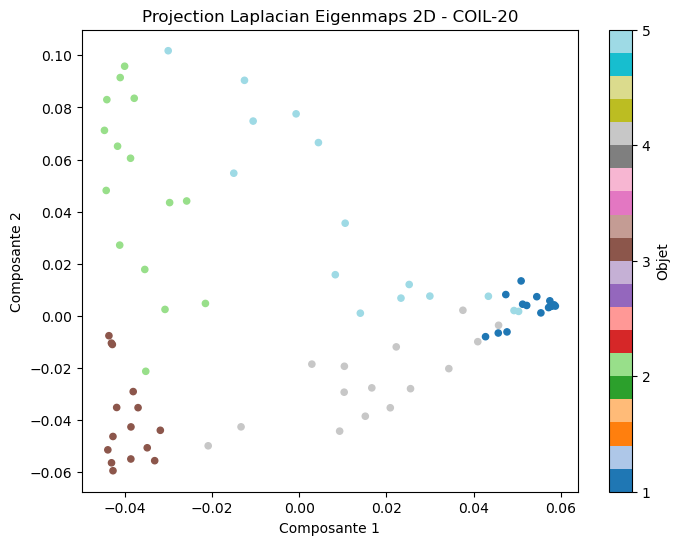

In [63]:
# 5. Visualisation
# -------------------------
def plot_2d(X_red, y, title):
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_red[:,0], X_red[:,1], c=y, cmap='tab20', s=20)
    plt.title(title)
    plt.xlabel('Composante 1')
    plt.ylabel('Composante 2')
    plt.colorbar(scatter, ticks=range(1,21), label='Objet')
    plt.show()

plot_2d(X_pca, y, "Projection PCA 2D - COIL-20")
plot_2d(X_iso, y, "Projection Isomap 2D - COIL-20")
plot_2d(X_lap, y, "Projection Laplacian Eigenmaps 2D - COIL-20")


In [64]:
# 6. Évaluation KNN sur projections
# -------------------------
def evaluate_knn(X_red, y, title):
    X_tr, X_te, y_tr, y_te = train_test_split(X_red, y, test_size=0.2, random_state=42, stratify=y)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_tr, y_tr)
    score = knn.score(X_te, y_te)
    print(f"Précision KNN sur {title}: {score*100:.2f}%")

evaluate_knn(X_pca, y, "PCA")
evaluate_knn(X_iso, y, "Isomap")
evaluate_knn(X_lap, y, "Laplacian Eigenmaps")

Précision KNN sur PCA: 66.67%
Précision KNN sur Isomap: 73.33%
Précision KNN sur Laplacian Eigenmaps: 86.67%
